In [1]:
# 사용할 데이터의 형태
data_type = '8'      # '1' : summarize X,개별 기사   '2' : summarize X,날짜별 기사
                    # '3' : summarize O,개별 기사   '4' : summarize O,날짜별 기사
normalized = 'done' # 'done' : 데이터 행별 normalize한 데이터     'not' : 데이터 행별 normalize 안한 데이터
erased_word = ''    # 제거된 단어 형태
num_word = '8000'   # 사용할 단어 수

# 돌려볼 모델의 구조
first_layer = 3000   # 모델의 첫 번째 레이어 수
second_layer = 1000  # 모델의 두 번째 레이어 수
ep = 60             # 모델의 에포크 수
ba = 1000            # 모델의 배치 사이즈

In [2]:
# 생성된 training, test의 x,y값을 pickle의 형태로 저장
import pickle
import os
path = os.getcwd()+'/pickles/'
if erased_word != '':
    erased_word = '_'+erased_word
with open(path+data_type+'train_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train_x = pickle.load(f)
with open(path+data_type+'train_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train_y = pickle.load(f)
with open(path+data_type+'train2_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train2_x = pickle.load(f)
with open(path+data_type+'train2_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train2_y = pickle.load(f)
with open(path+data_type+'test_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test_x = pickle.load(f)
with open(path+data_type+'test_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test_y = pickle.load(f)
with open(path+data_type+'test2_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test2_x = pickle.load(f)
with open(path+data_type+'test2_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test2_y = pickle.load(f)

In [3]:
# numpy 사용하여 float로 바꾸어주는 과정
import numpy as np
x_train = np.asarray(train_x).astype('float32')
y_train = np.asarray(train_y).astype('float32')
x_test = np.asarray(test_x).astype('float32')
y_test = np.asarray(test_y).astype('float32')

In [4]:
# DNN 학습 모델
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
#from tensorflow.keras.callbacks import EarlyStopping


#callbacks = [EarlyStopping(monitor='val_loss',patience = 20)]
model = models.Sequential()
n =len(x_train[0])
model.add(layers.Dense(first_layer,activation='relu'))#실제 쓸 단어갯수
model.add(layers.Dense(second_layer,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss = losses.categorical_crossentropy,metrics=[metrics.categorical_accuracy])

#hist = model.fit(x_train,y_train,epochs=ep,validation_data=(x_train2,y_train2),callbacks=callbacks,batch_size=ba, shuffle=True)
hist = model.fit(x_train,y_train,epochs=ep,validation_data=(x_test,y_test),batch_size=ba)


Epoch 1/60
10/10 [==============================] - 17s 2s/step - loss: 1.0911 - categorical_accuracy: 0.3744 - val_loss: 1.0873 - val_categorical_accuracy: 0.4134
Epoch 2/60
10/10 [==============================] - 10s 951ms/step - loss: 1.0757 - categorical_accuracy: 0.4108 - val_loss: 1.0743 - val_categorical_accuracy: 0.4330
Epoch 3/60
10/10 [==============================] - 9s 875ms/step - loss: 1.0642 - categorical_accuracy: 0.4357 - val_loss: 1.0800 - val_categorical_accuracy: 0.3882
Epoch 4/60
10/10 [==============================] - 9s 868ms/step - loss: 1.0263 - categorical_accuracy: 0.4502 - val_loss: 1.0596 - val_categorical_accuracy: 0.4331
Epoch 5/60
10/10 [==============================] - 9s 865ms/step - loss: 1.0081 - categorical_accuracy: 0.4847 - val_loss: 1.0439 - val_categorical_accuracy: 0.4527
Epoch 6/60
10/10 [==============================] - 9s 905ms/step - loss: 0.9615 - categorical_accuracy: 0.5236 - val_loss: 1.0357 - val_categorical_accuracy: 0.4643
Epoch

10/10 [==============================] - 9s 894ms/step - loss: 0.0720 - categorical_accuracy: 0.9794 - val_loss: 1.9118 - val_categorical_accuracy: 0.5249
Epoch 51/60
10/10 [==============================] - 9s 943ms/step - loss: 0.0491 - categorical_accuracy: 0.9845 - val_loss: 2.0888 - val_categorical_accuracy: 0.5246
Epoch 52/60
10/10 [==============================] - 9s 900ms/step - loss: 0.2657 - categorical_accuracy: 0.9170 - val_loss: 2.5598 - val_categorical_accuracy: 0.4678
Epoch 53/60
10/10 [==============================] - 9s 894ms/step - loss: 0.1032 - categorical_accuracy: 0.9605 - val_loss: 1.9878 - val_categorical_accuracy: 0.5243
Epoch 54/60
10/10 [==============================] - 9s 896ms/step - loss: 0.0439 - categorical_accuracy: 0.9853 - val_loss: 2.0923 - val_categorical_accuracy: 0.5222
Epoch 55/60
10/10 [==============================] - 9s 912ms/step - loss: 0.4504 - categorical_accuracy: 0.8655 - val_loss: 3.1611 - val_categorical_accuracy: 0.4517
Epoch 56/6

In [5]:
# 모델의 예측값을 튜플로 반환하는 함수
def predict(x):
    data = np.expand_dims(np.asarray(x).astype('float32'),axis=0)
    result = model.predict(data)
    return tuple(result[0])

In [6]:
# 모든 날짜의 예측값들을 합치기 위한 튜플의 합 함수
def sum_tuple(a,b):
    return (a[0]+b[0],a[1]+b[1],a[2]+b[2])

In [7]:
# Test set에 대한 예측 및 예측 정확도의 계산
import re

#count = 0
#sum_dic = {}
#for data in train2_x:
#    result = predict(data[0])
#    if data[1] in sum_dic:
#        sum_dic[data[1]] = sum_tuple(sum_dic[data[1]],result)
#    else:
#        sum_dic[data[1]] = result
    
#for date in sum_dic:
#    real = train2_y[date]
#    value = sum_dic[date].index(max(sum_dic[date]))
#    value -= 1
#    if real == value:
#        count = count + 1
#train_score = count / len(sum_dic)

count = 0
sum_dic = {}
for data in test2_x:
    result = predict(data[0])
    if data[1] in sum_dic:
        sum_dic[data[1]] = sum_tuple(sum_dic[data[1]],result)
    else:
        sum_dic[data[1]] = result
    
for date in sum_dic:
    real = test2_y[date]
    value = sum_dic[date].index(max(sum_dic[date]))
    value -= 1
    if real == value:
        count = count + 1
test_score = count / len(sum_dic)

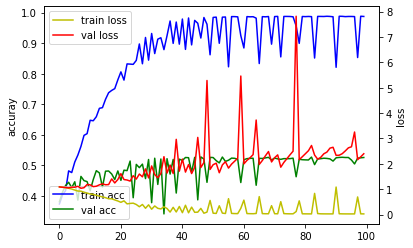

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, acc_ax = plt.subplots()

loss_ax = acc_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['categorical_accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_categorical_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [11]:
print('단어 갯수 : '+num_word)
print('모델 레이어 및 노드 수 : ','첫 번째 레이어 - relu,',first_layer,', 두 번째 레이어 - relu,',second_layer)
print('epochs : ',ep,', batch_size : ', ba)
#print('train 데이터 정확도 : ', train_score)
print('test 데이터 정확도 : ', test_score)

단어 갯수 : 8000
모델 레이어 및 노드 수 :  첫 번째 레이어 - relu, 3000 , 두 번째 레이어 - relu, 1000
epochs :  100 , batch_size :  1000
test 데이터 정확도 :  0.7905882352941176


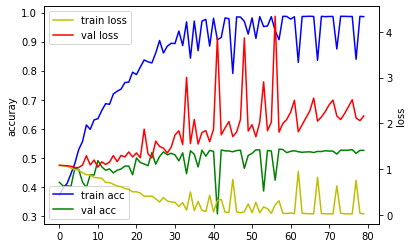

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, acc_ax = plt.subplots()

loss_ax = acc_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['categorical_accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_categorical_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [9]:
print('단어 갯수 : '+num_word)
print('모델 레이어 및 노드 수 : ','첫 번째 레이어 - relu,',first_layer,', 두 번째 레이어 - relu,',second_layer)
print('epochs : ',ep,', batch_size : ', ba)
#print('train 데이터 정확도 : ', train_score)
print('test 데이터 정확도 : ', test_score)

단어 갯수 : 8000
모델 레이어 및 노드 수 :  첫 번째 레이어 - relu, 3000 , 두 번째 레이어 - relu, 1000
epochs :  80 , batch_size :  1000
test 데이터 정확도 :  0.7670588235294118


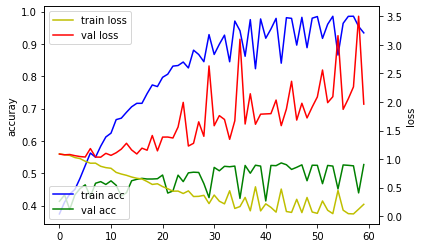

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, acc_ax = plt.subplots()

loss_ax = acc_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['categorical_accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_categorical_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [9]:
print('단어 갯수 : '+num_word)
print('모델 레이어 및 노드 수 : ','첫 번째 레이어 - relu,',first_layer,', 두 번째 레이어 - relu,',second_layer)
print('epochs : ',ep,', batch_size : ', ba)
#print('train 데이터 정확도 : ', train_score)
print('test 데이터 정확도 : ', test_score)

단어 갯수 : 8000
모델 레이어 및 노드 수 :  첫 번째 레이어 - relu, 3000 , 두 번째 레이어 - relu, 1000
epochs :  60 , batch_size :  1000
test 데이터 정확도 :  0.7741176470588236
